# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Anandaru Padmonurcahyo
- **Email:** ndarupadmo@gmail.com
- **ID Dicoding:** anandaru_padmonurcahyo_C47T

## Menentukan Pertanyaan Bisnis

- Bagiamana tren temperatur udara pada Kota Changping dalam 4 tahun terakhir?
- Pada bulan apa Kota Changping mengalami temperatur terendah dan tertinggi dalam 4 tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Wrangling

### Gathering Data

In [2]:
chang_df = pd.read_csv(r"C:\Users\User2\Desktop\Submission\Data\PRSA_Data_Changping_20130301-20170228.csv")
chang_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### Assessing Data

In [3]:
chang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
chang_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [5]:
chang_df.isna().sum().sum()

np.int64(5166)

In [6]:
print("Jumlah duplikasi: ", chang_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
chang_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


<Axes: ylabel='PM2.5'>

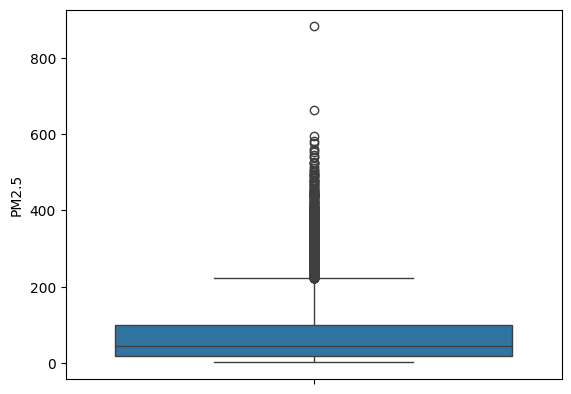

In [8]:
sns.boxplot(chang_df["PM2.5"])

<Axes: ylabel='PM10'>

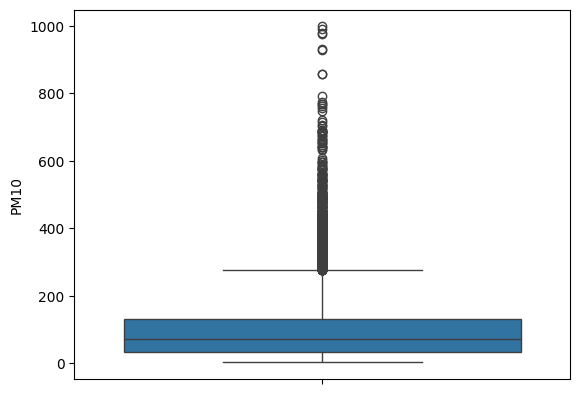

In [9]:
sns.boxplot(chang_df["PM10"])

<Axes: ylabel='SO2'>

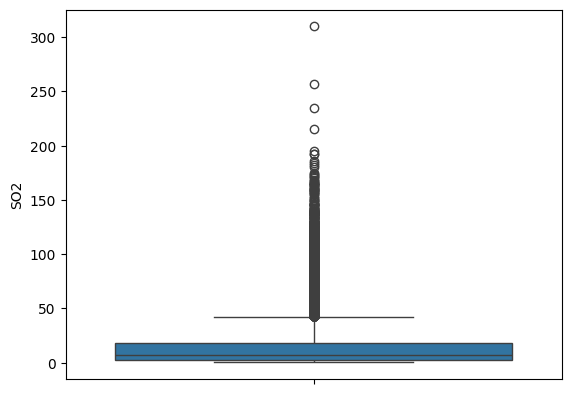

In [10]:
sns.boxplot(chang_df["SO2"])

<Axes: ylabel='NO2'>

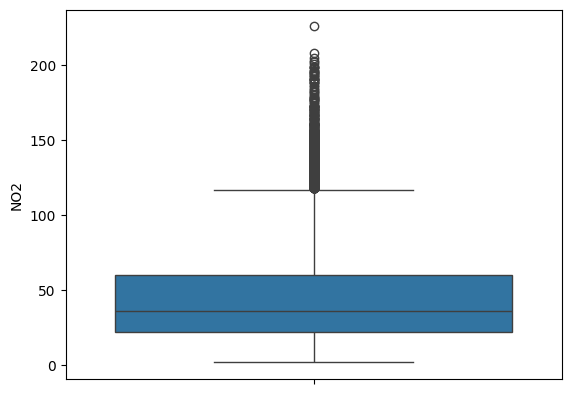

In [11]:
sns.boxplot(chang_df["NO2"])

<Axes: ylabel='CO'>

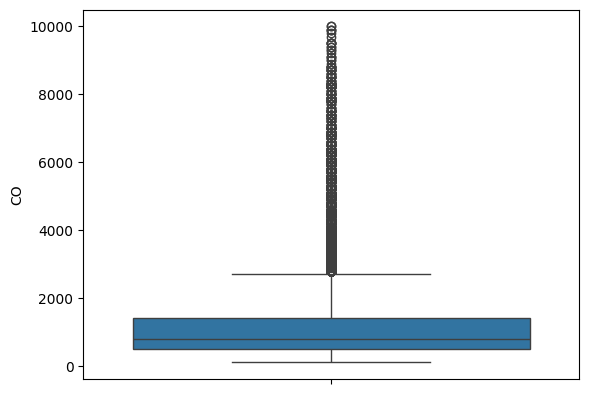

In [12]:
sns.boxplot(chang_df["CO"])

<Axes: ylabel='O3'>

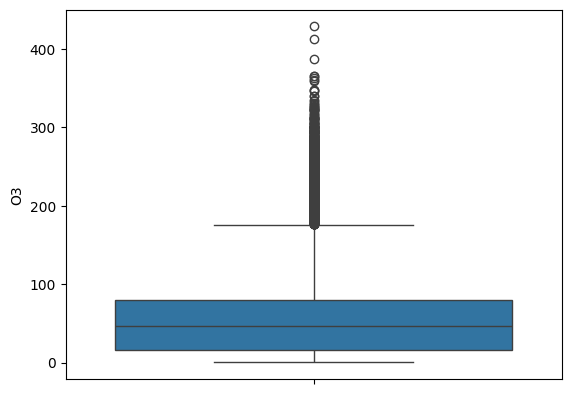

In [13]:
sns.boxplot(chang_df["O3"])

<Axes: ylabel='WSPM'>

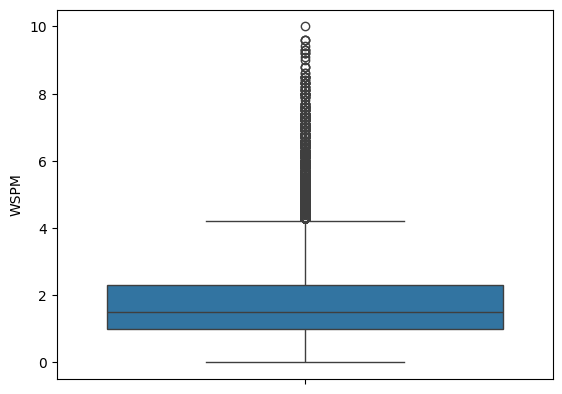

In [14]:
sns.boxplot(y=chang_df["WSPM"])

**Insight:**
- Terdapat total sebanyak 5166 Missing Values pada semua data kecuali no, year, month, day, hour, dan station
- Terdapat 8 data yang menunjukkan adanya outlier, yaitu pada PM2.5, PM10, SO2, NO2, CO, O3, dan WSPM
- Terdapat beberapa kejanggalan values yang terlalu ekstrem pada PM2.5, PM10, SO2, NO2, CO, O3. NOTE: Perlu di konfirmasikan kembali
- Tidak terdapat duplikat data


### Cleaning Data

In [15]:
chang_df2 = chang_df.copy()
chang_df2["date"] = pd.to_datetime(chang_df2[["year", "month", "day"]])
chang_df2["time"] = pd.to_datetime(chang_df2["hour"], format="%H").dt.time
chang_df2

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,time
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01,00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01,01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01,02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01,03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping,2017-02-28,19:00:00
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping,2017-02-28,20:00:00
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping,2017-02-28,21:00:00
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping,2017-02-28,22:00:00


In [16]:
cols = list(chang_df2.columns)
cols.insert(1, cols.pop(cols.index("date")))
cols.insert(2, cols.pop(cols.index("time")))

chang_df2 = chang_df2[cols]
chang_df2

,No,date,time,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01,01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01,02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01,03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01,04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017-02-28,19:00:00,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017-02-28,20:00:00,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017-02-28,21:00:00,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017-02-28,22:00:00,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [17]:
chang_dfNew = chang_df2.drop(columns=["year", "month", "day", "hour"])
chang_dfNew


,No,date,time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01,01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01,02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01,03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01,04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017-02-28,19:00:00,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017-02-28,20:00:00,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017-02-28,21:00:00,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017-02-28,22:00:00,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [18]:
chang_dfNew.head(10)

,No,date,time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01,01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01,02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01,03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01,04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013-03-01,05:00:00,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013-03-01,06:00:00,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013-03-01,07:00:00,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013-03-01,08:00:00,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013-03-01,09:00:00,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


In [19]:
chang_dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   time     35064 non-null  object        
 3   PM2.5    34290 non-null  float64       
 4   PM10     34482 non-null  float64       
 5   SO2      34436 non-null  float64       
 6   NO2      34397 non-null  float64       
 7   CO       33543 non-null  float64       
 8   O3       34460 non-null  float64       
 9   TEMP     35011 non-null  float64       
 10  PRES     35014 non-null  float64       
 11  DEWP     35011 non-null  float64       
 12  RAIN     35013 non-null  float64       
 13  wd       34924 non-null  object        
 14  WSPM     35021 non-null  float64       
 15  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(3)
memory usage: 4.3+ MB

In [20]:
chang_dfNew = chang_dfNew.reset_index(drop=True)
chang_dfNew

,No,date,time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01,01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01,02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01,03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01,04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017-02-28,19:00:00,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017-02-28,20:00:00,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017-02-28,21:00:00,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017-02-28,22:00:00,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [21]:
chang_filldf = chang_dfNew.copy()
chang_filldf = chang_filldf.set_index("date")

for column in chang_filldf.columns:
    if column != "time":
        chang_filldf[column] = chang_filldf[column].interpolate(method="time")

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\1185663913.py:6: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  chang_filldf[column] = chang_filldf[column].interpolate(method="time")
C:\Users\User2\AppData\Local\Temp\ipykernel_13596\1185663913.py:6: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  chang_filldf[column] = chang_filldf[column].interpolate(method="time")


In [22]:
chang_filldf.reset_index()

,date,No,time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01,1,00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013-03-01,2,01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013-03-01,3,02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013-03-01,4,03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013-03-01,5,04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28,35060,19:00:00,28.0,47.0,4.0,14.0,300.0,54.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,2017-02-28,35061,20:00:00,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,2017-02-28,35062,21:00:00,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,2017-02-28,35063,22:00:00,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [23]:
chang_filldf.isnull().sum()

No           0
time         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

In [24]:
most_frequent_wd = chang_filldf["wd"].mode()[0]
chang_filldf["wd"] = chang_filldf["wd"].fillna(most_frequent_wd)

In [25]:
chang_filldf.isnull().sum()

No         0
time       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [26]:
chang_clean_outlier = chang_filldf.copy()

q1 = chang_clean_outlier["PM2.5"].quantile(0.25)
q3 = chang_clean_outlier["PM2.5"].quantile(0.75)
iqr = q3 - q1

upper_limit_PM25 = q3 + (1.5 * iqr)
lower_limit_PM25 = q1 - (1.5 * iqr)

In [27]:
chang_clean_outlier["PM2.5"] = np.clip(chang_clean_outlier["PM2.5"], lower_limit_PM25, upper_limit_PM25)

In [28]:
lower_limit_PM25, upper_limit_PM25

(np.float64(-103.5), np.float64(220.5))

<Axes: ylabel='PM2.5'>

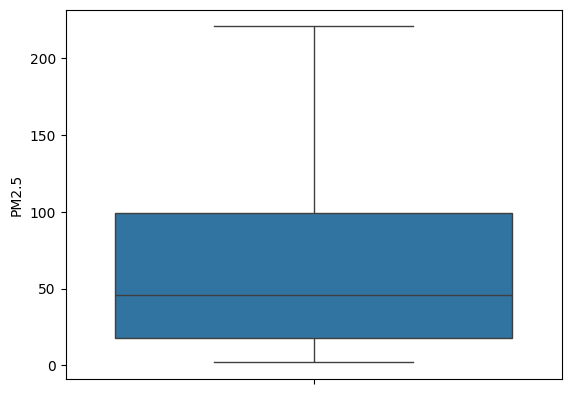

In [29]:
sns.boxplot(chang_clean_outlier["PM2.5"])

In [30]:
q1 = chang_clean_outlier["PM10"].quantile(0.25)
q3 = chang_clean_outlier["PM10"].quantile(0.75)
iqr = q3 - q1

upper_limit_PM10 = q3 + (1.5 * iqr)
lower_limit_PM10 = q1 - (1.5 * iqr)

In [31]:
lower_limit_PM10, upper_limit_PM10

(np.float64(-110.0), np.float64(274.0))

In [32]:
chang_clean_outlier["PM10"] = np.clip(chang_clean_outlier["PM10"], lower_limit_PM10, upper_limit_PM10)

<Axes: ylabel='PM10'>

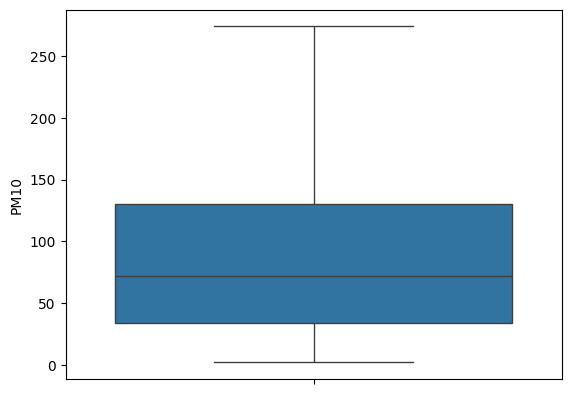

In [33]:
sns.boxplot(chang_clean_outlier["PM10"])

In [34]:
q1 = chang_clean_outlier["SO2"].quantile(0.25)
q3 = chang_clean_outlier["SO2"].quantile(0.75)
iqr = q3 - q1

upper_limit_SO2 = q3 + (1.5 * iqr)
lower_limit_SO2 = q1 - (1.5 * iqr)

In [35]:
lower_limit_SO2, upper_limit_SO2

(np.float64(-22.0), np.float64(42.0))

In [36]:
chang_clean_outlier["SO2"] = np.clip(chang_clean_outlier["SO2"], lower_limit_SO2, upper_limit_SO2)

<Axes: ylabel='SO2'>

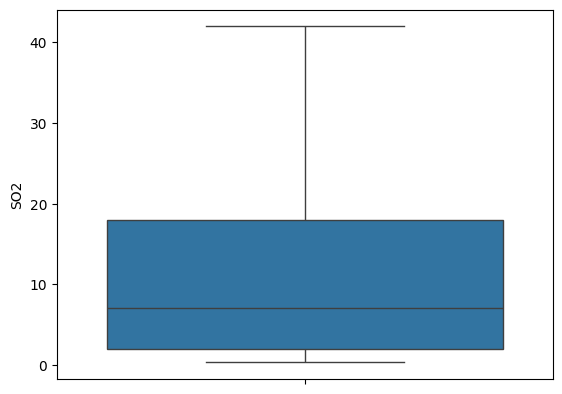

In [37]:
sns.boxplot(chang_clean_outlier["SO2"])

In [38]:
q1 = chang_clean_outlier["NO2"].quantile(0.25)
q3 = chang_clean_outlier["NO2"].quantile(0.75)
iqr = q3 - q1

upper_limit_NO2 = q3 + (1.5 * iqr)
lower_limit_NO2 = q1 - (1.5 * iqr)

In [39]:
lower_limit_NO2, upper_limit_NO2

(np.float64(-35.61428749999999), np.float64(118.02381249999999))

In [40]:
chang_clean_outlier["NO2"] = np.clip(chang_clean_outlier["NO2"], lower_limit_NO2, upper_limit_NO2)

<Axes: ylabel='NO2'>

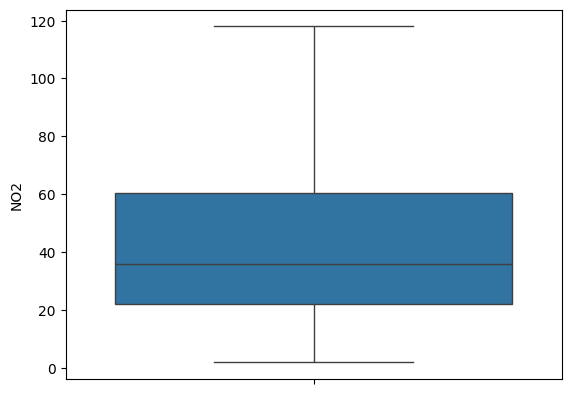

In [41]:
sns.boxplot(chang_clean_outlier["NO2"])

In [42]:
q1 = chang_clean_outlier["CO"].quantile(0.25)
q3 = chang_clean_outlier["CO"].quantile(0.75)
iqr = q3 - q1

upper_limit_CO = q3 + (1.5 * iqr)
lower_limit_CO = q1 - (1.5 * iqr)

In [43]:
upper_limit_CO, lower_limit_CO

(np.float64(2750.0), np.float64(-850.0))

In [44]:
chang_clean_outlier["CO"] = np.clip(chang_clean_outlier["CO"], lower_limit_CO, upper_limit_CO)

<Axes: ylabel='CO'>

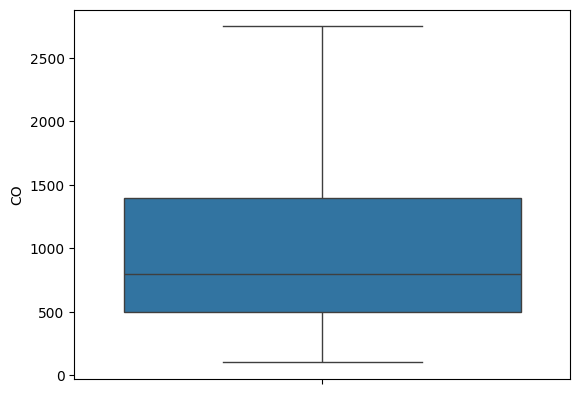

In [45]:
sns.boxplot(chang_clean_outlier["CO"])

In [46]:
q1 = chang_clean_outlier["O3"].quantile(0.25)
q3 = chang_clean_outlier["O3"].quantile(0.75)
iqr = q3 - q1

upper_limit_O3 = q3 + (1.5 * iqr)
lower_limit_O3 = q1 - (1.5 * iqr)

In [47]:
lower_limit_O3, upper_limit_O3

(np.float64(-80.90849999999999), np.float64(176.5451))

In [48]:
chang_clean_outlier["O3"] = np.clip(chang_clean_outlier["O3"], lower_limit_O3, upper_limit_O3)

<Axes: ylabel='O3'>

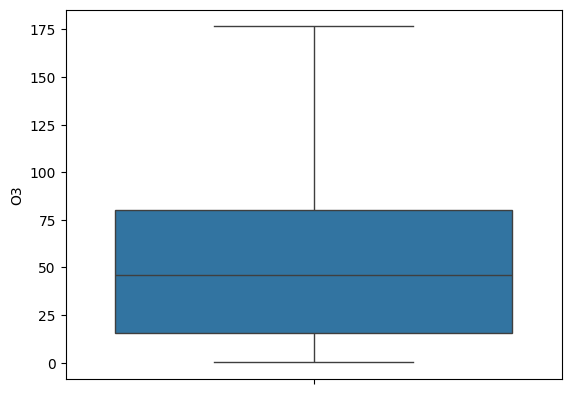

In [49]:
sns.boxplot(chang_clean_outlier["O3"])

In [50]:
q1 = chang_clean_outlier["WSPM"].quantile(0.25)
q3 = chang_clean_outlier["WSPM"].quantile(0.75)
iqr = q3 - q1

upper_limit_WSPM = q3 + (1.5 * iqr)
lower_limit_WSPM = q1 - (1.5 * iqr)

In [51]:
upper_limit_WSPM, lower_limit_WSPM

(np.float64(4.25), np.float64(-0.9499999999999997))

In [52]:
chang_clean_outlier["WSPM"] = np.clip(chang_clean_outlier["WSPM"], lower_limit_WSPM, upper_limit_WSPM)

<Axes: ylabel='WSPM'>

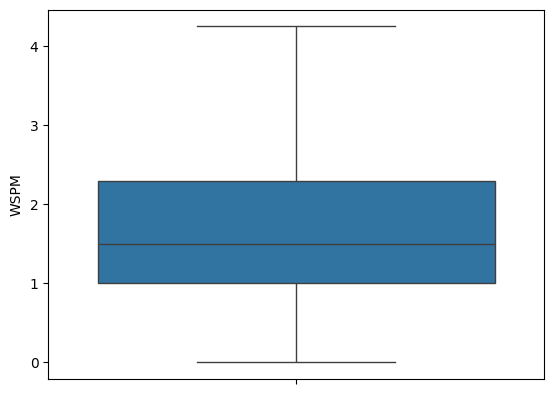

In [53]:
sns.boxplot(chang_clean_outlier["WSPM"])

In [54]:
chang_clean_outlier.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,67.578591,91.365751,12.474284,43.785437,1043.393851,55.823316,13.669703,1007.772181,1.488073,0.060290,1.776194
std,10122.249256,61.760645,71.713889,13.151169,28.079301,751.421462,47.789373,11.368859,10.228425,13.827466,0.752356,1.088570
min,1.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,99.000000,130.000000,18.000000,60.409525,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,220.500000,274.000000,42.000000,118.023812,2750.000000,176.545100,41.400000,1036.500000,27.200000,52.100000,4.250000


**Insight:**
- Missing values sudah diisi menggunakan interpolasi dengan method time. Hal ini menjadi dasar untuk mengubah kolom year, month, dan day menjadi datetimeindex. Kemudian, Khusus untuk kolom WD, missing values diisi menggunakan method linear bfill
- Outlier sudah diperbaiki menggunakan capping. Pemilihan capping dibandingkan dengan trimming didasarkan pada pertanyaan analisis yang berbasiskan pola waktu.
- Setelah melakukan cleaning pada data, statistik deskriptif menunjukkan value yang cukup plausible pada setiap kolom

## Exploratory Data Analysis (EDA)

### Explore ...

In [55]:
chang_cleandf = chang_clean_outlier.copy()

chang_cleandf.drop(columns=["No"], inplace=True)

In [56]:
chang_cleandf = chang_cleandf.reset_index()

In [57]:
chang_cleandf.head(10)

,date,time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01,00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013-03-01,01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013-03-01,02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013-03-01,03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013-03-01,04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,2013-03-01,05:00:00,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,2013-03-01,06:00:00,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,2013-03-01,07:00:00,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,2013-03-01,08:00:00,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,2013-03-01,09:00:00,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


In [58]:
chang_cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   time     35064 non-null  object        
 2   PM2.5    35064 non-null  float64       
 3   PM10     35064 non-null  float64       
 4   SO2      35064 non-null  float64       
 5   NO2      35064 non-null  float64       
 6   CO       35064 non-null  float64       
 7   O3       35064 non-null  float64       
 8   TEMP     35064 non-null  float64       
 9   PRES     35064 non-null  float64       
 10  DEWP     35064 non-null  float64       
 11  RAIN     35064 non-null  float64       
 12  wd       35064 non-null  object        
 13  WSPM     35064 non-null  float64       
 14  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(3)
memory usage: 4.0+ MB


In [59]:
chang_cleandf.describe()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 00:00:00,67.578591,91.365751,12.474284,43.785437,1043.393851,55.823316,13.669703,1007.772181,1.488073,0.060290,1.776194
min,2013-03-01 00:00:00,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014-03-01 00:00:00,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,2015-03-01 00:00:00,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,2016-02-29 00:00:00,99.000000,130.000000,18.000000,60.409525,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017-02-28 00:00:00,220.500000,274.000000,42.000000,118.023812,2750.000000,176.545100,41.400000,1036.500000,27.200000,52.100000,4.250000
std,NaN,61.760645,71.713889,13.151169,28.079301,751.421462,47.789373,11.368859,10.228425,13.827466,0.752356,1.088570


In [60]:
chang_temp_df = chang_cleandf[["date", "time", "TEMP"]]
chang_temp_df.head()

,date,time,TEMP
0,2013-03-01,00:00:00,-2.3
1,2013-03-01,01:00:00,-2.5
2,2013-03-01,02:00:00,-3.0
3,2013-03-01,03:00:00,-3.6
4,2013-03-01,04:00:00,-3.5


In [61]:
daily_temp_df = chang_temp_df.groupby(by="date").agg({
    "TEMP": ["min", "max", "mean"]
    })
daily_temp_df.head()

TEMP                
            min   max      mean
date                           
2013-03-01 -4.5   6.0  0.812500
2013-03-02 -3.5   3.0 -0.395833
2013-03-03 -5.7  17.0  5.329167
2013-03-04  4.0  16.1  9.237500
2013-03-05 -1.0  14.1  6.462500

In [62]:
def weather_condition(mean_temp):
  if mean_temp < 0:
    return "Freezing"
  elif 0 <= mean_temp <= 20:
    return "Cold"
  elif 21 <= mean_temp <= 26:
    return "Warm"
  elif 27 <= mean_temp <= 30:
    return "Humid"
  elif 31 <= mean_temp <= 39:
    return "Hot"
  else:
    return "Extreme Hot"

daily_temp_df["weather condition"] = daily_temp_df[("TEMP", "mean")].apply(weather_condition)


In [63]:
daily_temp_df.head()

TEMP                 weather condition
            min   max      mean                  
date                                             
2013-03-01 -4.5   6.0  0.812500              Cold
2013-03-02 -3.5   3.0 -0.395833          Freezing
2013-03-03 -5.7  17.0  5.329167              Cold
2013-03-04  4.0  16.1  9.237500              Cold
2013-03-05 -1.0  14.1  6.462500              Cold

In [64]:
mean_cols = [col for col in chang_cleandf.columns if col not in ["date", "time", "wd", "station"]]

agg_dict = {col: ["mean"] for col in mean_cols}
agg_dict["wd"] = lambda x: x.value_counts().index[0]

new_changdf1 = chang_cleandf.groupby("date").agg(agg_dict)
new_changdf1.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,<lambda>
date,,,,,,,,,,,,
2013-03-01,5.083333,18.958333,16.000000,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.127083,N
2013-03-02,33.333333,39.833333,37.791667,60.000000,945.833333,30.250000,-0.395833,1023.729167,-16.116667,0.0,0.929167,NNE
2013-03-03,57.541667,82.666667,30.416667,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.270833,NE
2013-03-04,20.791667,36.166667,21.333333,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.358333,NW
2013-03-05,106.958333,125.166667,38.250000,74.710318,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667,NNE


In [65]:
weather_condition_df = daily_temp_df[['weather condition']].copy()
chang_dfMerge = pd.concat([new_changdf1, weather_condition_df], axis=1)
chang_dfMerge = chang_dfMerge.rename(columns={"weather condition": "weather_condition"})
chang_dfMerge.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,weather_condition
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,<lambda>,
date,,,,,,,,,,,,,
2013-03-01,5.083333,18.958333,16.000000,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.127083,N,Cold
2013-03-02,33.333333,39.833333,37.791667,60.000000,945.833333,30.250000,-0.395833,1023.729167,-16.116667,0.0,0.929167,NNE,Freezing
2013-03-03,57.541667,82.666667,30.416667,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.270833,NE,Cold
2013-03-04,20.791667,36.166667,21.333333,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.358333,NW,Cold
2013-03-05,106.958333,125.166667,38.250000,74.710318,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667,NNE,Cold


In [66]:
chang_daily = chang_dfMerge.reset_index()
chang_daily.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,weather_condition
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,<lambda>,
0,2013-03-01,5.083333,18.958333,16.000000,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.127083,N,Cold
1,2013-03-02,33.333333,39.833333,37.791667,60.000000,945.833333,30.250000,-0.395833,1023.729167,-16.116667,0.0,0.929167,NNE,Freezing
2,2013-03-03,57.541667,82.666667,30.416667,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.270833,NE,Cold
3,2013-03-04,20.791667,36.166667,21.333333,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.358333,NW,Cold
4,2013-03-05,106.958333,125.166667,38.250000,74.710318,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667,NNE,Cold


In [67]:
chang_monthly_temp = chang_daily.groupby(pd.Grouper(key="date", freq="M")).mean(numeric_only=True)
chang_monthly_temp.index = chang_monthly_temp.index.strftime("%Y-%m")
chang_monthly_temp = chang_monthly_temp.reset_index()
chang_monthly_temp.head()

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\95428834.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chang_monthly_temp = chang_daily.groupby(pd.Grouper(key="date", freq="M")).mean(numeric_only=True)
C:\Users\User2\AppData\Local\Temp\ipykernel_13596\95428834.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  chang_monthly_temp = chang_daily.groupby(pd.Grouper(key="date", freq="M")).mean(numeric_only=True)


,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,2013-03,93.010081,118.439516,25.278226,57.574154,1330.865591,59.835529,5.904032,1009.412903,-7.478763,0.031048,1.677554
1,2013-04,59.121528,89.488889,15.327963,36.836183,774.666667,67.678754,12.412222,1004.982083,-4.264028,0.015556,2.066389
2,2013-05,80.528226,116.595430,20.440604,37.562742,786.706989,90.575158,21.985618,999.797177,6.492204,0.005376,1.798454
3,2013-06,79.229861,100.627778,12.539126,31.718193,1042.925595,78.076537,23.706389,996.906667,16.540833,0.146806,1.248194
4,2013-07,61.881048,64.912634,6.559878,24.926997,818.987327,76.276066,27.271640,992.801210,19.896237,0.229301,1.329973


In [68]:
chang_monthly_temp["weather_condition"] = chang_monthly_temp[("TEMP", "mean")].apply(weather_condition)

In [69]:
#Monthly weather condition
chang_monthly = chang_monthly_temp.copy()
chang_monthly.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,weather_condition
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,
0,2013-03,93.010081,118.439516,25.278226,57.574154,1330.865591,59.835529,5.904032,1009.412903,-7.478763,0.031048,1.677554,Cold
1,2013-04,59.121528,89.488889,15.327963,36.836183,774.666667,67.678754,12.412222,1004.982083,-4.264028,0.015556,2.066389,Cold
2,2013-05,80.528226,116.595430,20.440604,37.562742,786.706989,90.575158,21.985618,999.797177,6.492204,0.005376,1.798454,Warm
3,2013-06,79.229861,100.627778,12.539126,31.718193,1042.925595,78.076537,23.706389,996.906667,16.540833,0.146806,1.248194,Warm
4,2013-07,61.881048,64.912634,6.559878,24.926997,818.987327,76.276066,27.271640,992.801210,19.896237,0.229301,1.329973,Humid


In [70]:
chang_yearly = chang_monthly.copy()
chang_yearly["date"] = pd.to_datetime(chang_yearly["date"])
chang_yearly.index = chang_yearly["date"].dt.year
chang_yearly = chang_yearly.groupby(pd.Grouper(key="date", freq="Y")).mean(numeric_only=True)
chang_yearly = chang_yearly.reset_index()
chang_yearly.head()

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\3442189829.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  chang_yearly = chang_yearly.groupby(pd.Grouper(key="date", freq="Y")).mean(numeric_only=True)
C:\Users\User2\AppData\Local\Temp\ipykernel_13596\3442189829.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  chang_yearly = chang_yearly.groupby(pd.Grouper(key="date", freq="Y")).mean(numeric_only=True)


,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,2013-12-31,70.195921,90.090502,15.851398,40.726986,987.145705,59.144640,15.959306,1004.963675,4.470605,0.066134,1.581804
1,2014-12-31,75.306995,103.716182,16.008138,45.699611,1102.269652,59.899910,14.089640,1008.224599,0.982539,0.037745,1.793878
2,2015-12-31,65.716380,88.580965,10.291706,42.311082,1018.814617,55.924602,13.494408,1007.924895,1.706152,0.082062,1.770074
3,2016-12-31,59.145116,83.570717,7.945715,45.008943,1031.009049,52.236089,13.467422,1007.935723,1.608124,0.064745,1.892037
4,2017-12-31,70.923783,87.012889,15.488983,49.343526,1212.668011,33.146193,0.488789,1018.349257,-14.101603,0.001488,2.009320


In [ ]:
#Yearly weather conditions
chang_yearly["weather_condition"] = chang_yearly[("TEMP", "mean")].apply(weather_condition)
chang_yearly.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,weather_condition
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,
0,2013-12-31,70.195921,90.090502,15.851398,40.726986,987.145705,59.144640,15.959306,1004.963675,4.470605,0.066134,1.581804,Cold
1,2014-12-31,75.306995,103.716182,16.008138,45.699611,1102.269652,59.899910,14.089640,1008.224599,0.982539,0.037745,1.793878,Cold
2,2015-12-31,65.716380,88.580965,10.291706,42.311082,1018.814617,55.924602,13.494408,1007.924895,1.706152,0.082062,1.770074,Cold
3,2016-12-31,59.145116,83.570717,7.945715,45.008943,1031.009049,52.236089,13.467422,1007.935723,1.608124,0.064745,1.892037,Cold
4,2017-12-31,70.923783,87.012889,15.488983,49.343526,1212.668011,33.146193,0.488789,1018.349257,-14.101603,0.001488,2.009320,Cold


In [72]:
chang_HLdf = chang_monthly.copy()
new_columns = []
for col in chang_HLdf.columns:
    if isinstance(col, tuple):
        # Take the first element of the tuple
        new_columns.append(col[0])
    else:
        new_columns.append(col)
chang_HLdf.columns = new_columns
chang_HLdf.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,weather_condition
0,2013-03,93.010081,118.439516,25.278226,57.574154,1330.865591,59.835529,5.904032,1009.412903,-7.478763,0.031048,1.677554,Cold
1,2013-04,59.121528,89.488889,15.327963,36.836183,774.666667,67.678754,12.412222,1004.982083,-4.264028,0.015556,2.066389,Cold
2,2013-05,80.528226,116.595430,20.440604,37.562742,786.706989,90.575158,21.985618,999.797177,6.492204,0.005376,1.798454,Warm
3,2013-06,79.229861,100.627778,12.539126,31.718193,1042.925595,78.076537,23.706389,996.906667,16.540833,0.146806,1.248194,Warm
4,2013-07,61.881048,64.912634,6.559878,24.926997,818.987327,76.276066,27.271640,992.801210,19.896237,0.229301,1.329973,Humid


In [73]:
# Highest temperature for each months

chang_HLdf["date"] = pd.to_datetime(chang_HLdf["date"])
idx = chang_HLdf.groupby(chang_HLdf["date"].dt.year)["TEMP"].idxmax()
highest_temp_df = chang_HLdf.loc[idx][["date", "TEMP"]].copy()
highest_temp_df.columns = ["Date", "Highest Temp"]
highest_temp_df["Year"] = highest_temp_df["Date"].dt.year
highest_temp_df["Month"] = highest_temp_df["Date"].dt.month_name()
highest_temp_df = highest_temp_df[["Year", "Month", "Highest Temp"]]
highest_temp_df = highest_temp_df.reset_index(drop=True)

highest_temp_df

,Year,Month,Highest Temp
0,2013,July,27.271640
1,2014,July,28.358737
2,2015,July,26.248387
3,2016,August,27.188441
4,2017,February,2.375523


In [74]:
# Lowest temperature for each months

idx = chang_HLdf.groupby(chang_HLdf["date"].dt.year)["TEMP"].idxmin()
lowest_temp_df = chang_HLdf.loc[idx][["date", "TEMP"]].copy()
lowest_temp_df.columns = ["Date", "Lowest Temp"]
lowest_temp_df["Year"] = lowest_temp_df["Date"].dt.year
lowest_temp_df["Month"] = lowest_temp_df["Date"].dt.month_name()
lowest_temp_df = lowest_temp_df[["Year", "Month", "Lowest Temp"]]
lowest_temp_df = lowest_temp_df.reset_index(drop=True)

lowest_temp_df

,Year,Month,Lowest Temp
0,2013,December,0.839785
1,2014,December,-0.570565
2,2015,January,-0.634946
3,2016,January,-4.150269
4,2017,January,-1.397945


**Insight:**
- Selama 4 tahun berturut-turut, rata-rata suhu pada Kota Changping berada pada kategori "Cold" atau dingin dengan suhu diantara 0-20 derajat celsius
- Dalam 4 tahun terkahir, rata-rata bulan yang memiliki suhu terendah pada Kota Changping berada pada bulan Januari dan suhu tertinggi terdapat pada bulan Juli

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagiamana tren temperatur udara pada Kota Changping dalam 4 tahun terakhir?


In [75]:
def visualize_temperature_trend(data, start_year, end_year):

    # Filter data for the specified year range
    data["date"] = pd.to_datetime(data["date"])
    filtered_data = data[
        (data["date"].dt.year >= start_year) &
        (data["date"].dt.year <= end_year)
    ]

    # Set y-axis order using an ordered categorical type
    weather_condition_order = ["Extreme", "Hot", "Humid", "Warm", "Cold", "Freezing"]
    filtered_data["weather_condition"] = pd.Categorical(filtered_data["weather_condition"], categories=weather_condition_order.reverse(), ordered=False)

    # Create the line chart using Seaborn with the ordered categorical data
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    sns.lineplot(x=filtered_data["date"].dt.month, y=filtered_data["weather_condition"], marker="o")

    # Customize the chart
    plt.xlabel("Month")
    plt.ylabel("Weather Condition")
    plt.title(f"Weather Condition Trend in Changping City ({start_year} - {end_year})")
    plt.xticks(range(1, 13), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"])

    #Make the range
    temperature_ranges = {
        "Freezing": "<0\u00b0C",
        "Cold": "0-20\u00b0C",
        "Warm": "21-26\u00b0C",
        "Humid": "27-30\u00b0C",
        "Hot": "31-39\u00b0C",
        "Extreme": ">39\u00b0C"
    }

    y_labels = [f"{condition} ({temperature_ranges[condition]})" for condition in weather_condition_order]

    plt.yticks(range(len(weather_condition_order)), y_labels)
    plt.gca().invert_yaxis()

    plt.show()

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\4202731859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["weather_condition"] = pd.Categorical(filtered_data["weather_condition"], categories=weather_condition_order.reverse(), ordered=False)


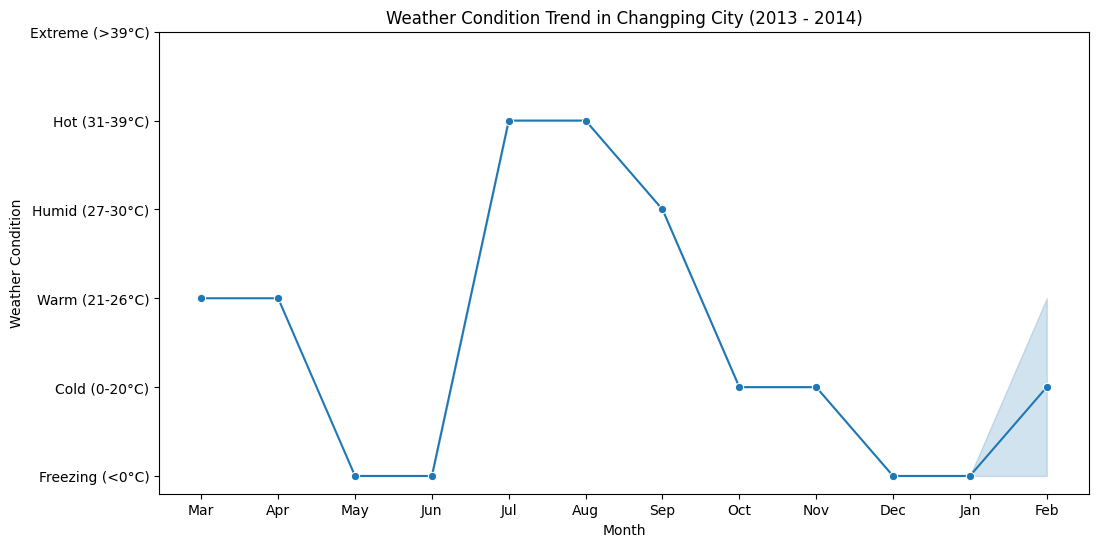

In [76]:
visualize_temperature_trend(chang_monthly, 2013, 2014)

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\4202731859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["weather_condition"] = pd.Categorical(filtered_data["weather_condition"], categories=weather_condition_order.reverse(), ordered=False)


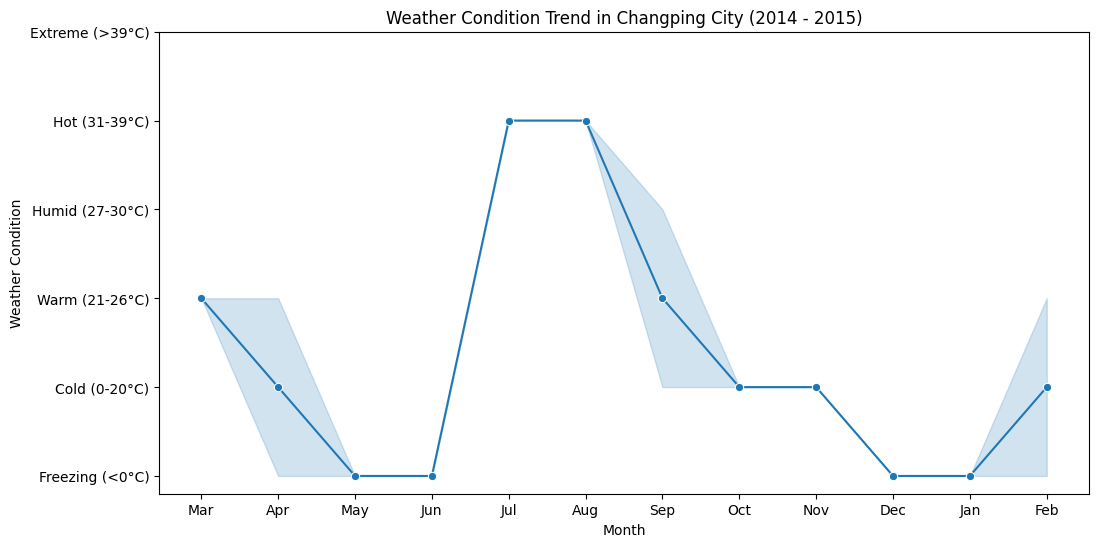

In [77]:
visualize_temperature_trend(chang_monthly, 2014, 2015)

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\4202731859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["weather_condition"] = pd.Categorical(filtered_data["weather_condition"], categories=weather_condition_order.reverse(), ordered=False)


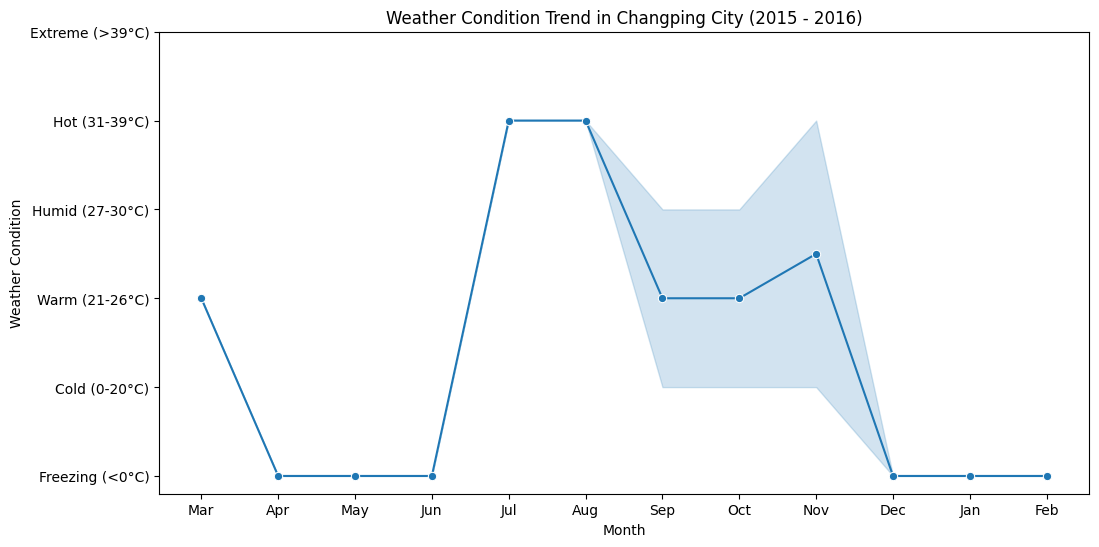

In [78]:
visualize_temperature_trend(chang_monthly, 2015, 2016)

C:\Users\User2\AppData\Local\Temp\ipykernel_13596\4202731859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["weather_condition"] = pd.Categorical(filtered_data["weather_condition"], categories=weather_condition_order.reverse(), ordered=False)


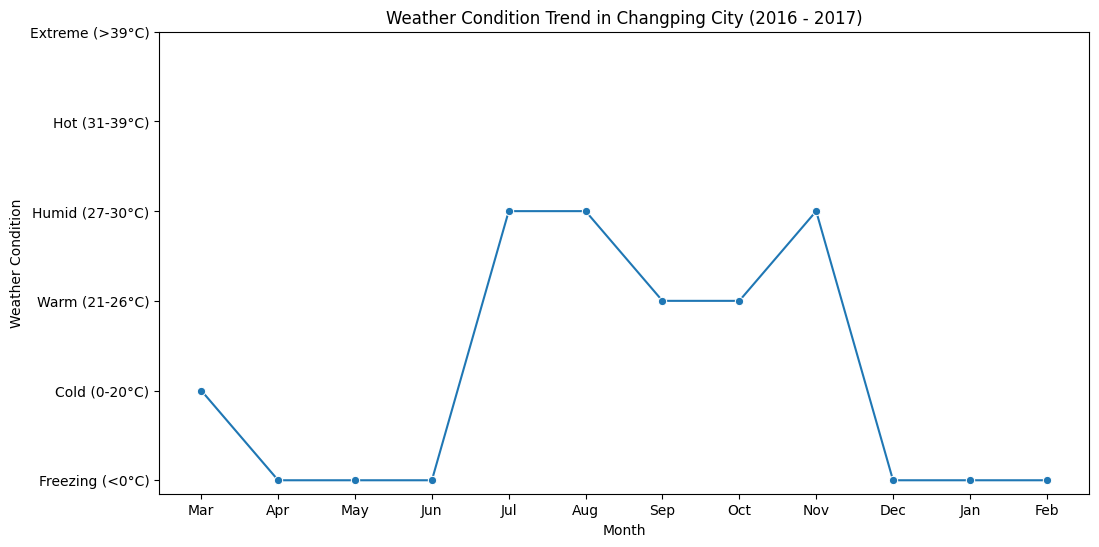

In [79]:
visualize_temperature_trend(chang_monthly, 2016, 2017)

### Pertanyaan 2: Pada bulan apa Kota Changping mengalami temperatur terendah dan tertinggi dalam 4 tahun terakhir?

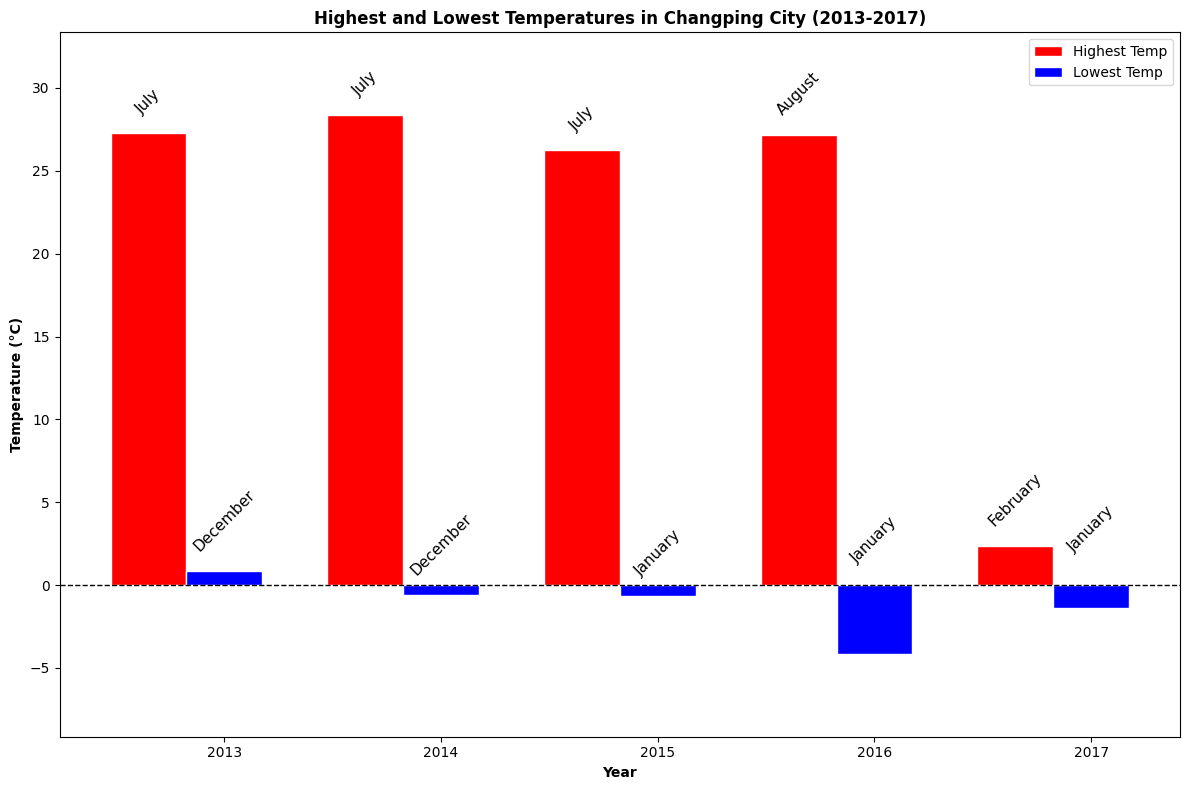

In [80]:
years = highest_temp_df["Year"].unique()

# Create arrays for highest and lowest temperatures and months
highest_temps = highest_temp_df["Highest Temp"].values
lowest_temps = lowest_temp_df["Lowest Temp"].values
highest_months = highest_temp_df["Month"].values
lowest_months = lowest_temp_df["Month"].values

# Set the width
bar_width = 0.35

# Set the positions on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(r1, highest_temps, color="red", width=bar_width, edgecolor="white", label="Highest Temp")
bars2 = ax.bar(r2, lowest_temps, color="blue", width=bar_width, edgecolor="white", label="Lowest Temp")

# Add labels, title, and legend
ax.set_xlabel("Year", fontweight="bold")
ax.set_xticks([r + bar_width for r in range(len(years))], years)
ax.set_ylabel("Temperature (°C)", fontweight="bold")
ax.set_title("Highest and Lowest Temperatures in Changping City (2013-2017)", fontweight="bold")
ax.legend()

# Adjust y-axis limits to include negative values
ax.set_ylim(min(lowest_temps) - 5, max(highest_temps) + 5)

# Add month labels on top of the bars
for bar, month in zip(bars1, highest_months):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, month, ha="center", va="bottom", rotation=45, fontsize=11)

for bar, month, year in zip(bars2, lowest_months, years):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height() + 1

    if month == "January" and year in [2016]:
        y_pos += 4.3

    if month == "January" and year in [2017]:
        y_pos += 2.2

    ax.text(x_pos, y_pos, month,
            ha="center", va="bottom", rotation=45, fontsize=11)

# Show chart
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.tight_layout()
plt.show()

**Insight:**
- Kenaikan suhu pada Kota Changping selama 4 tahun berturut-turun terlihat memuncak pada bulan Juli, namun tidak mencapai tingkat suhu yang ekstrem. Setelah memuncak di bulan Juli, suhu perlahan mengalami penurunan sampai di bulan Januari dan tidak sampai dibawah 0 derajat celsius
- Selama 4 tahun berturut-turut, bulan yang memiliki suhu tertinggi adalah bulan Juli dengan temperatur dalam kategori Humid, dan suhu terendah pada bulan Januari dalam kategori Cold menuju Freezing

## Analisis Lanjutan (Opsional)

In [81]:
# (Skip)

## Conclusion

- Tren dan pola temperature pada Kota Changping selama 4 tahun, dari tahun 2013-2017, mengalami perubahan yang cukup mirip, yaitu suhu akan mengalami penurunan dari bulan Februari sampai bulan Juni, kemudian mengalami peningkatan yang cukup signifikan dari bulan Juni sampai Juli. Kemudian, suhu akan kembali turun sampai di bulan Januari
- Dari tahun 2013-2017, rata-rata bulan yang memiliki suhu tertinggi jatuh pada bulan Juli, dan bulan dengan suhu terendah jatuh pada bulan Januari

In [82]:
'''
chang_monthly.to_csv("chang_monthly.csv", index=False)
chang_yearly.to_csv("chang_yearly.csv", index=False)
highest_temp_df.to_csv("highest_temp_df.csv", index=False)
lowest_temp_df.to_csv("lowest_temp_df.csv", index=False)
'''

'\nchang_monthly.to_csv("chang_monthly.csv", index=False)\nchang_yearly.to_csv("chang_yearly.csv", index=False)\nhighest_temp_df.to_csv("highest_temp_df.csv", index=False)\nlowest_temp_df.to_csv("lowest_temp_df.csv", index=False)\n'